In [33]:
import pandas as pd
import matplotlib.pyplot as plt

## Question 3

In [34]:
scatter = pd.read_csv('scatter.csv')
scatter

,x,y
0,18.212036,-1.339505
1,13.589432,-0.362639
2,26.419547,-0.976902
3,8.385861,0.254355
4,17.379218,0.119563
...,...,...
95,12.804362,0.367318
96,22.789449,-1.008340
97,24.736929,-1.025019
98,-5.012734,-0.835878


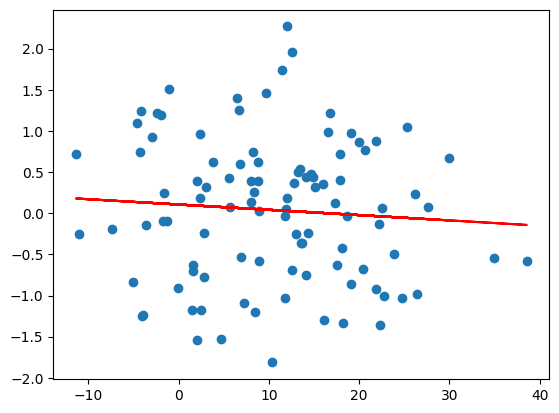

In [35]:
# Regression plot
from scipy.stats import linregress

m, c, r_value, p_value, std_err = linregress(scatter['x'],scatter['y'])

plt.plot(scatter['x'], scatter['y'], 'o')
plt.plot(scatter['x'], m*scatter['x']+c, 'r-')
plt.show()


#### At the first go, the relationship between x and y does not seem to be strong. The slight downward slope indicates that there tends to be a slight decrease in y values with an increase in x values. To get a better idea about the correlation between x and y, pandas Pearson correlation has been considered as shown below:

In [36]:
scatter['x'].corr(scatter['y'])

-0.07455858625155169

#### As noticeable from the regression graph, the small negative value indicates very mild negative correlation between x and y

## Question 4

Text(0.5, 1.0, 'Histogram of x')

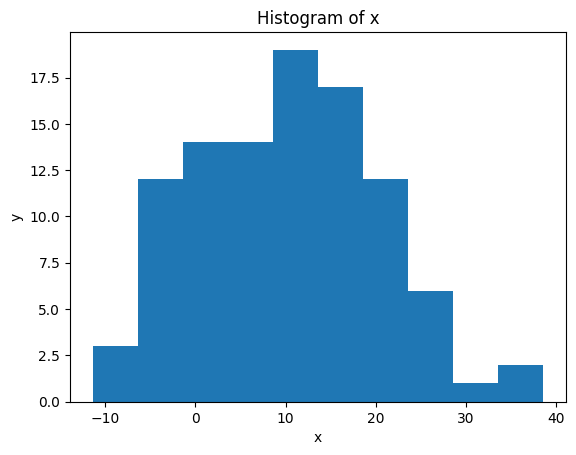

In [37]:
# Plot histogram of scatter['x'] here
plt.hist(scatter['x'])
# Add axis labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Histogram of x')

## Question 6

#### Read the datasets

##### Attempt 1: Simple Linear Regression model 

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the datasets
train = pd.read_csv('train.csv', header=None, parse_dates=[0])
test = pd.read_csv('test.csv', header=None, parse_dates=[0])

# Label the columns
column_names = ['date', 'location', 'x', 'y', 'z', 'target']
train.columns = column_names
test.columns = column_names[:-1]

# Select training columns
train_X = train[['x', 'y', 'z']]
train_y = train['target']

# Fit a Linear Regression model onto the training set
lr = LinearRegression()

lr.fit(train_X, train_y)

train_pred = lr.predict(train_X)
mse_train = mean_squared_error(train_y, train_pred)
print("Training Set Mean Squared Error: %.2f" % mse_train)

# Predict the outcomes
test_X = test[['x', 'y', 'z']]
test_y = lr.predict(test_X)

# The train set can be split into train and validation for testing. But since this is a simple regression model, I will test out a couple of other options with more hyperparameter tuning options 

Training Set Mean Squared Error: 0.21


##### Attempt 2: XGB Regressor model

#### Read the datasets and rename the columns

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb

# Load the datasets
train = pd.read_csv('train.csv', header=None, parse_dates=[0])
test = pd.read_csv('test.csv', header=None, parse_dates=[0])

# Label the columns
column_names = ['date', 'location', 'x', 'y', 'z', 'target']
train.columns = column_names
test.columns = column_names[:-1]  

#### Preprocess the data
##### The categorical column "location" was encoded using sklearn label encoder. Initially, tried to separate the date column into day, month, year (date) and hour, minute, seconds (time) and normalize it using StandardScaler. This did not perform too well upon running the XGBRegression model. Hence, removed scaling and the results improved.

In [114]:
def preprocess_data(df):
    # Extract features from the date column
    # df['year'] = df['date'].dt.year
    # df['month'] = df['date'].dt.month
    # df['day'] = df['date'].dt.day
    # df['hour'] = df['date'].dt.hour
    # df['minute'] = df['date'].dt.minute
    
    # Drop the original date column
    df = df.drop(columns=['date'])
    
    # Fill missing values for numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns
    numeric_medians = df[numeric_columns].median()
    df[numeric_columns] = df[numeric_columns].fillna(numeric_medians)
    
    # Encode categorical features
    le = LabelEncoder()
    df['location'] = le.fit_transform(df['location'])
    
    # # Scale numerical features
    # scaler = StandardScaler()
    # num_cols = df.columns[df.dtypes != 'object']
    # df[num_cols] = scaler.fit_transform(df[num_cols])
    
    return df

train = preprocess_data(train)
test = preprocess_data(test)

# print(train.describe())
# print(train['target'].value_counts())


#### XGB Regressor is implemented. Hyperparameter tuning has been done to get the results shown below

In [124]:
from xgboost.sklearn import XGBRegressor

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train.drop(columns=['target']), train['target'], test_size=0.2, random_state=42)

# Define the parameters
params = {
    'objective': 'reg:logistic',
    'eval_metric': 'rmse',
    'max_depth': 5,
    'min_child_weight': 1,
    'eta': 0.2,
    'subsample': 0.5,
    'colsample_bytree': 0.5,
}

# Create an XGBRegressor instance
model = XGBRegressor(**params, n_estimators=1000)

# Train the model
outcome = model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

[0]	validation_0-rmse:0.48486
[1]	validation_0-rmse:0.47482
[2]	validation_0-rmse:0.46836
[3]	validation_0-rmse:0.46404
[4]	validation_0-rmse:0.46117
[5]	validation_0-rmse:0.45931
[6]	validation_0-rmse:0.45698
[7]	validation_0-rmse:0.45624
[8]	validation_0-rmse:0.45576
[9]	validation_0-rmse:0.45534
[10]	validation_0-rmse:0.45433
[11]	validation_0-rmse:0.45417
[12]	validation_0-rmse:0.45352
[13]	validation_0-rmse:0.45348
[14]	validation_0-rmse:0.45340
[15]	validation_0-rmse:0.45338
[16]	validation_0-rmse:0.45332
[17]	validation_0-rmse:0.45331
[18]	validation_0-rmse:0.45322
[19]	validation_0-rmse:0.45323
[20]	validation_0-rmse:0.45320
[21]	validation_0-rmse:0.45309
[22]	validation_0-rmse:0.45306
[23]	validation_0-rmse:0.45306
[24]	validation_0-rmse:0.45300
[25]	validation_0-rmse:0.45301
[26]	validation_0-rmse:0.45302
[27]	validation_0-rmse:0.45285
[28]	validation_0-rmse:0.45279
[29]	validation_0-rmse:0.45270
[30]	validation_0-rmse:0.45271
[31]	validation_0-rmse:0.45236
[32]	validation_0-

##### The baseline (mean value) and rmse values are compared

In [130]:
import numpy as np

# Calculate the mean of the target variable in the training data
mean_target = y_train.mean()

# Compute the predicted values for the validation data using the mean as the baseline
y_pred_baseline = np.full_like(y_val, mean_target)

# Calculate the RMSE for the baseline model
rmse_baseline = np.sqrt(mean_squared_error(y_val, y_pred_baseline))

# Print the baseline RMSE and XGBoost RMSE
print(f"Baseline RMSE: {rmse_baseline:.5f}")
print(f"XGBoost RMSE:")  # You can replace 0.97856 with the final RMSE of your XGBoost model

# Compare the RMSE values
if rmse_baseline > 0.45056:
    print("The XGBoost model performs better than the baseline model.")
else:
    print("The XGBoost model does not perform better than the baseline model.")


Baseline RMSE: 0.54399
XGBoost RMSE:
The XGBoost model performs better than the baseline model.


##### Rescale the output to get values between 0 and 1

In [102]:
from scipy.special import expit

# Make predictions on the test data
raw_predictions = model.predict(test)

# Convert the raw predictions to probabilities using the sigmoid function
predictions = expit(raw_predictions)

# Save the predictions to labels.txt
np.savetxt('labels.txt', predictions, fmt='%.6f')


##### Attempt 3: With a classifier instead of a Regressor

In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error

train_data = pd.read_csv('train.csv', header=None, parse_dates=[0])
test_data = pd.read_csv('test.csv', header=None, parse_dates=[0])

# Label the columns
column_names = ['date', 'location', 'x', 'y', 'z', 'target']
train_data.columns = column_names
test_data.columns = column_names[:-1]  


# Preprocess data
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['timestamp'] = train_data['date'].astype(np.int64) // 10**9

test_data['date'] = pd.to_datetime(test_data['date'])
test_data['timestamp'] = test_data['date'].astype(np.int64) // 10**9

# Drop unnecessary columns
train_data = train_data.drop(['date', 'location'], axis=1)
test_data = test_data.drop(['date', 'location'], axis=1)

# Train-validation split
X = train_data.drop('target', axis=1)
y = train_data['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# Evaluate model
y_val_pred = gbm.predict_proba(X_val)[:, 1]
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f'Validation RMSE: {rmse}')

# Generate predictions for test data
X_test = test_data
y_test_pred = gbm.predict_proba(X_test)[:, 1]

# Save predictions to file
np.savetxt('labels.txt', y_test_pred, fmt='%.7f')


Validation RMSE: 0.4517075022900307


##### Performing grid search on the above model

In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, make_scorer

# Custom scorer for RMSE
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_score = make_scorer(rmse_scorer, greater_is_better=False)

# Load train and test data
train_data = pd.read_csv('train.csv', header=None, parse_dates=[0])
test_data = pd.read_csv('test.csv', header=None, parse_dates=[0])

# Label the columns
column_names = ['date', 'location', 'x', 'y', 'z', 'target']
train_data.columns = column_names
test_data.columns = column_names[:-1]  

# Preprocess data
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['timestamp'] = train_data['date'].astype(np.int64) // 10**9

test_data['date'] = pd.to_datetime(test_data['date'])
test_data['timestamp'] = test_data['date'].astype(np.int64) // 10**9

# Drop unnecessary columns
train_data = train_data.drop(['date', 'location'], axis=1)
test_data = test_data.drop(['date', 'location'], axis=1)

# Train-test split
X = train_data.drop('target', axis=1)
y = train_data['target']

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# Train model using GridSearchCV
gbm = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gbm, param_grid, cv=5, scoring=rmse_score, n_jobs=-1)
grid_search.fit(X, y)

# Get the best model and its score
best_gbm = grid_search.best_estimator_
best_rmse = -grid_search.best_score_
print(f'Best RMSE: {best_rmse}')
print(f'Best parameters: {grid_search.best_params_}')

# Generate predictions for test data
X_test = test_data
y_test_pred = best_gbm.predict_proba(X_test)[:, 1]

# Save predictions to file
np.savetxt('labels.txt', y_test_pred, fmt='%.7f')


Best RMSE: 0.5448045519818858
Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}


#### Identify the most important features

Best RMSE: 0.5448045519818858
Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}


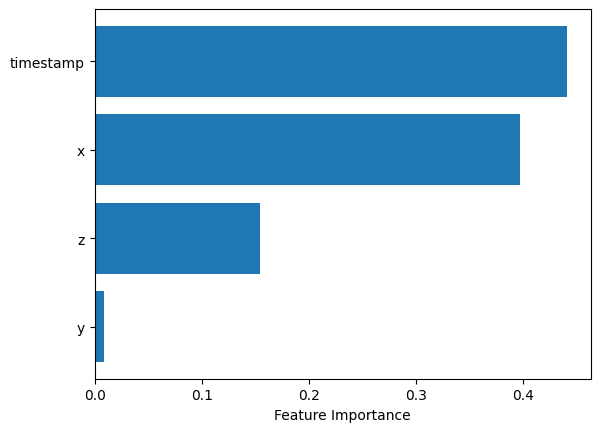

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, make_scorer

# Custom scorer for RMSE
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_score = make_scorer(rmse_scorer, greater_is_better=False)

# Load train and test data
train_data = pd.read_csv('train.csv', header=None, parse_dates=[0])
test_data = pd.read_csv('test.csv', header=None, parse_dates=[0])

# Label the columns
column_names = ['date', 'location', 'x', 'y', 'z', 'target']
train_data.columns = column_names
test_data.columns = column_names[:-1]  

# Preprocess data
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['timestamp'] = train_data['date'].astype(np.int64) // 10**9

test_data['date'] = pd.to_datetime(test_data['date'])
test_data['timestamp'] = test_data['date'].astype(np.int64) // 10**9

# Drop unnecessary columns
train_data = train_data.drop(['date', 'location'], axis=1)
test_data = test_data.drop(['date', 'location'], axis=1)

# Train-test split
X = train_data.drop('target', axis=1)
y = train_data['target']

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# Train model using GridSearchCV
gbm = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gbm, param_grid, cv=5, scoring=rmse_score, n_jobs=-1)
grid_search.fit(X, y)

# Get the best model and its score
best_gbm = grid_search.best_estimator_
best_rmse = -grid_search.best_score_
print(f'Best RMSE: {best_rmse}')
print(f'Best parameters: {grid_search.best_params_}')

# Feature importance
feature_importance = best_gbm.feature_importances_
sorted_idx = feature_importance.argsort()

plt.barh(range(X.shape[1]), feature_importance[sorted_idx])
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.show()

# Generate predictions for test data
X_test = test_data
y_test_pred = best_gbm.predict_proba(X_test)[:, 1]

# Save predictions to file
np.savetxt('labels.txt', y_test_pred, fmt='%.7f')
